# Name : Kanaganandini Kanagaraj
# Reg_no: BL.EN.U4AIE21064
# Date: 4/03/24

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

22050


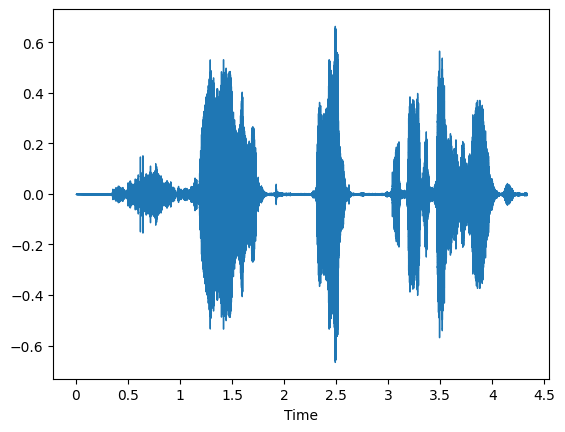

In [ ]:
#file is the input audio file
file = '/content/output.wav'


y, sr = librosa.load(file)
#displaying the waveform of audio
librosa.display.waveshow(y)
print(sr)




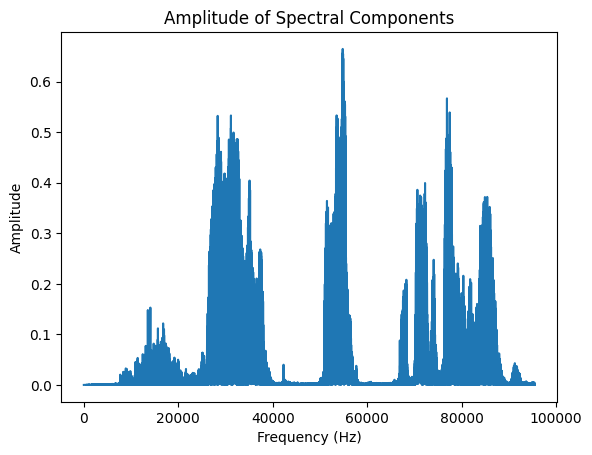

In [ ]:
plt.plot(np.abs(y))
plt.title("Amplitude of Spectral Components")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
fft = np.fft.fft(y)
print(len(y))

95492


In [ ]:
fftfrq = np.fft.fftfreq(len(y),1/sr)

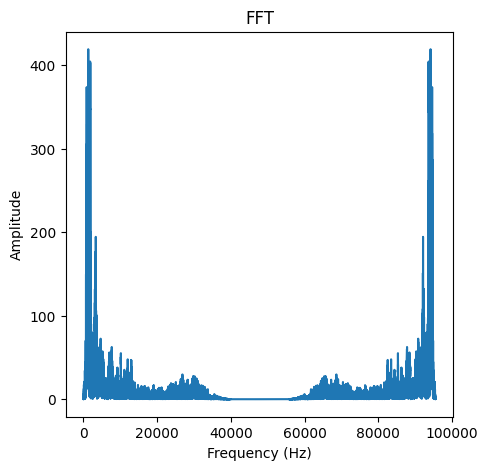

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(np.abs(fft))
plt.title("FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()



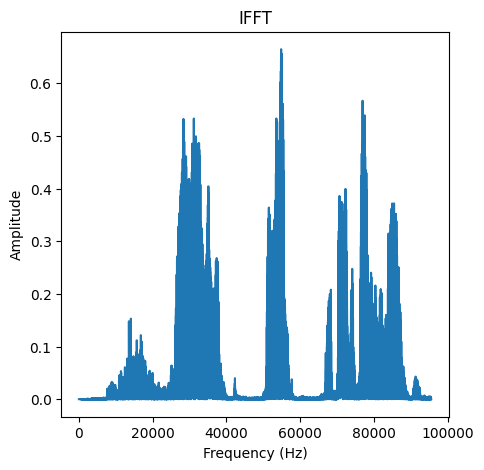

In [ ]:
ifft = np.fft.ifft(fft)

plt.figure(figsize=(5, 5))
plt.plot(np.abs(ifft))
plt.title("IFFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()



## A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

In [72]:

def rectangular_window(freq, low, high):
    return np.where((np.abs(freq) >= low) & (np.abs(freq) <= high), 1, 0)


def cosine_window(freq, low, high):
    return np.cos(np.pi * (np.abs(freq) - low) / (high - low)) * ((np.abs(freq) >= low) & (np.abs(freq) <= high))

def gaussian_window(freq, low ,sigma):
    return np.exp(-0.5 * ((np.abs(freq) - low) / sigma) ** 2)


low_freq = 1000
high_freq = 4000
sigma = 500
s = np.fft.fft(y)
n = len(s)
freq = np.fft.fftfreq(n, 1/sr)

# Apply filters
rectangular_filter_fft = rectangular_window(freq, low_freq, high_freq)
cosine_filter_fft = cosine_window(freq, low_freq, high_freq)
gaussian_filter_fft = gaussian_window(freq, low_freq, sigma)

# Inverse transform filtered signals
rectangular_filtered_signal = np.fft.ifft(rectangular_filter_fft).astype(np.int16)
cosine_filtered_signal = np.fft.ifft(cosine_filter_fft).astype(np.int16)
gaussian_filtered_signal = np.fft.ifft(gaussian_filter_fft).astype(np.int16)

# Save filtered signals to listen

wavfile.write("rectangular_filtered_signal.wav", sr, rectangular_filtered_signal)
wavfile.write("cosine_filtered_signal.wav",sr, cosine_filtered_signal)
wavfile.write("gaussian_filtered_signal.wav", sr, gaussian_filtered_signal)


<ipython-input-72-76f70f983e51>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  rectangular_filtered_signal = np.fft.ifft(rectangular_filter_fft).astype(np.int16)
<ipython-input-72-76f70f983e51>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  cosine_filtered_signal = np.fft.ifft(cosine_filter_fft).astype(np.int16)
<ipython-input-72-76f70f983e51>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  gaussian_filtered_signal = np.fft.ifft(gaussian_filter_fft).astype(np.int16)


In [73]:
from glob import glob
import IPython.display as ipd
af1 = glob("/content/rectangular_filtered_signal.wav")
ipd.Audio(af1[0])

In [60]:
af2 = glob("/content/cosine_filtered_signal.wav")
ipd.Audio(af2[0])

In [61]:
af = glob("/content/rectangular_filtered_signal.wav")
ipd.Audio(af[0])